In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

from sklearn.feature_selection import RFECV, VarianceThreshold, RFE
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
import matplotlib

In [2]:
#drive connection
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/WinnipegDataset.csv', index_col=False)
data = data.sample(frac=1, random_state=42)

In [4]:
# input split
X = data.drop(columns=['label'], axis=1)
y = data['label']
print(X.shape)
print(y.shape)

(325834, 174)
(325834,)


In [5]:
print(X[0:15])
y[0:15]

             f1      f2      f3      f4       f5      f6       f7       f8  \
226963 -13.1370 -21.449 -10.931 -15.042 -11.1700 -15.417 -2.20610  -8.3114   
236508 -15.4540 -25.751 -16.978 -19.937 -15.1580 -19.761  1.52380 -10.2970   
73890  -11.2610 -20.674 -14.406 -15.627 -11.9590 -15.445  3.14540  -9.4126   
60111  -10.1450 -18.265 -11.658 -13.644 -10.3940 -13.434  1.51240  -8.1194   
185449 -17.9690 -27.450 -15.982 -20.374 -16.6690 -19.109 -1.98610  -9.4818   
137372 -20.1460 -28.975 -17.329 -22.345 -17.7490 -21.668 -2.81610  -8.8295   
121690 -17.9200 -27.535 -17.800 -22.400 -16.6670 -21.422 -0.11991  -9.6150   
229854 -15.3120 -26.094 -16.718 -19.491 -15.2390 -19.205  1.40600 -10.7830   
215994 -14.9310 -25.275 -13.957 -20.512 -12.3850 -20.620 -0.97426 -10.3440   
46411  -13.7820 -23.104 -17.274 -19.216 -14.0040 -18.624  3.49200  -9.3216   
81791   -9.5403 -18.260 -11.749 -13.635  -9.9023 -13.246  2.20890  -8.7200   
67033  -10.5620 -18.903 -14.562 -14.752 -11.8900 -14.258  4.0004

226963    5
236508    5
73890     3
60111     3
185449    4
137372    4
121690    4
229854    5
215994    5
46411     3
81791     3
67033     3
155607    4
200443    5
62665     3
Name: label, dtype: int64

In [6]:
#Checking if missing data exists
for col in X:
    if pd.isnull(X[col]).any():
        print('containing NA values:', col)

In [7]:
#Eliminate low variance features
x_org = X
selector = VarianceThreshold(0.2)
selector.fit(x_org)
X = x_org[x_org.columns[selector.get_support(indices=True)]]
print('number of columns after dropping by variance threshold:', X.shape[1])
print(y.shape)

number of columns after dropping by variance threshold: 76
(325834,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
model = ExtraTreesClassifier(n_estimators=200, max_depth=3, min_samples_leaf=.06, n_jobs=-1, random_state=42)
model.fit(X_train,y_train)
print(accuracy_score(model.predict(X_test), y_test))

0.8188960670277902


In [9]:
importance_values = np.absolute(model.feature_importances_)
importance_fatures_sorted = pd.DataFrame(importance_values.reshape([-1, len(X.columns)]), columns=X.columns).mean(axis=0).sort_values(ascending=False).to_frame()
importance_fatures_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
importance_fatures_sorted['ranking']= importance_fatures_sorted['feature_importance'].rank(ascending=False)
display(importance_fatures_sorted.head(50))

selected_features_by_model = importance_fatures_sorted.index[:51].tolist()
print(len(selected_features_by_model))

,feature_importance,ranking
f116,0.046850,1.0
f114,0.042825,2.0
f37,0.042041,3.0
f121,0.040014,4.0
f5,0.035350,5.0
f51,0.033133,6.0
f159,0.033002,7.0
f88,0.032674,8.0
f3,0.032400,9.0
f138,0.031717,10.0


51


RFECV

In [10]:
#it takes much more time comparing to the feature selelction by model
rfecv = RFECV(estimator=model, step=1, cv=StratifiedShuffleSplit(1, test_size=0.2, random_state=42), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train[selected_features_by_model], y_train)

RFECV(cv=StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None),
      estimator=ExtraTreesClassifier(max_depth=3, min_samples_leaf=0.06,
                                     n_estimators=200, n_jobs=-1,
                                     random_state=42),
      n_jobs=-1, scoring='accuracy')

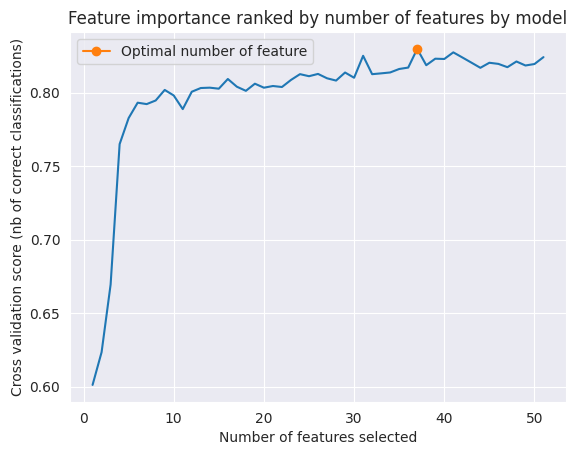

In [11]:
plt.figure()
plt.title('Feature importance ranked by number of features by model')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['split0_test_score']) + 1), rfecv.cv_results_['split0_test_score'])
plt.plot(rfecv.n_features_, rfecv.cv_results_['split0_test_score'][rfecv.n_features_-1], marker='o', label='Optimal number of feature')
plt.legend(loc='best')
plt.show()
rfecv.cv_results_['split0_test_score']
plt.show()

In [12]:
rfecv_df = pd.DataFrame({'col': selected_features_by_model})
rfecv_df['rank'] = np.nan
for index, support in enumerate(rfecv.get_support(indices=True)):
    rfecv_df.loc[support, 'rank'] = index
for index, rank in enumerate(rfecv.ranking_ -2):
    if rank >= 0:
        rfecv_df.loc[index, 'rank'] = rfecv.n_features_ + rank
rfecv_df.sort_values("rank")
final_features = rfecv_df.sort_values("rank")[:15]
print(final_features)

     col  rank
0   f116   0.0
1   f114   1.0
2    f37   2.0
3   f121   3.0
4     f5   4.0
5    f51   5.0
6   f159   6.0
7    f88   7.0
8     f3   8.0
9   f138   9.0
10   f56  10.0
11   f79  11.0
12  f140  12.0
13   f39  13.0
14  f119  14.0


In [13]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train[final_features["col"]],y_train)

y_pred = clf.predict(X_test[final_features["col"]])

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9916


In [14]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(y_pred[:20])
print(y_test[:20])

[3 6 5 3 1 4 4 3 3 6 6 4 4 3 6 4 3 6 6 5]
49766     3
251705    6
211750    5
106723    3
23800     1
122890    4
138031    4
107386    3
62287     3
318893    6
243661    6
36934     1
147169    4
84679     3
316891    6
137630    4
79489     3
255847    6
269951    6
232247    5
Name: label, dtype: int64


In [15]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 7794     0     8    18     1     5     6]
 [    3   714     0     3     0     0     0]
 [    0     0 15116    11     6     2     0]
 [   13     0    13 14739    28    20     0]
 [    6     0     6    26  9172   209     4]
 [    8     0     3    15   125 16862     2]
 [    8     0     1     0     0     0   220]]


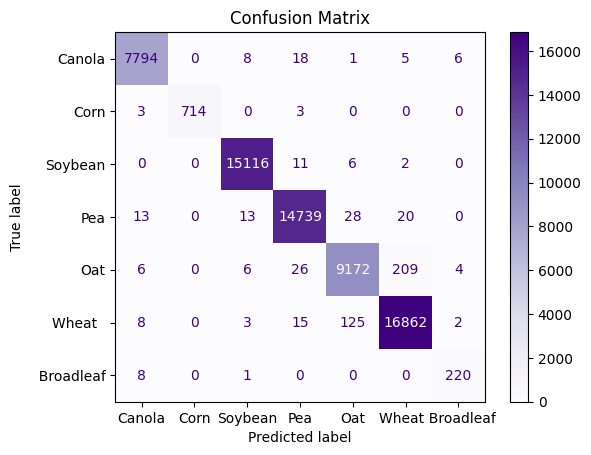

In [16]:
matplotlib.style.use('default')
classNames = ['Canola', 'Corn', 'Soybean','Pea','Oat','Wheat  ','  Broadleaf']
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = classNames)
cmDisplay.plot(cmap = 'Purples')

plt.title("Confusion Matrix")
plt.show()

In [17]:
# metrics for each class

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classNames, digits = 4))


Classification Report

              precision    recall  f1-score   support

      Canola     0.9951    0.9951    0.9951      7832
        Corn     1.0000    0.9917    0.9958       720
     Soybean     0.9980    0.9987    0.9983     15135
         Pea     0.9951    0.9950    0.9950     14813
         Oat     0.9829    0.9734    0.9781      9423
     Wheat       0.9862    0.9910    0.9886     17015
   Broadleaf     0.9483    0.9607    0.9544       229

    accuracy                         0.9916     65167
   macro avg     0.9865    0.9865    0.9865     65167
weighted avg     0.9916    0.9916    0.9916     65167



In [18]:
# overall metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

error_rate = 1 - accuracy
print('Error Rate: %.4f' % error_rate)

precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print('Precision: %.4f' % precision)

recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print('Recall: %.4f' % recall)

fScore = metrics.f1_score(y_test, y_pred, average = 'micro')
print('f score: %.4f' % fScore)

kappaScore = metrics.cohen_kappa_score(y_test, y_pred)
print('kappa score: %.4f' % kappaScore)

Accuracy: 0.9916
Error Rate: 0.0084
Precision: 0.9916
Recall: 0.9916
f score: 0.9916
kappa score: 0.9893
